# Задача 17 (Кудимов, 343 гр.)
Используя метод переменных направлений, решить задачу
\begin{cases}
\displaystyle \frac{\partial u}{\partial t} = \Delta u + t \sin x \cos y, \quad 0 < x < \pi, \quad 0<y < \pi \\
u \big|_{x=0, \pi}=0, \quad \frac{\partial u}{\partial y} \big|_{y=0,\pi}=0, \quad u \big|_{t=0}=0
\end{cases}

Найдем аналитическое решение. Построим вспомогательную задачу Штурма-Лиувилля
\begin{align}
\begin{cases}
\Delta v(M) + \lambda v(M) = 0 \\
v \big|_{x=0, \pi}=0, \quad v_y \big|_{y=0,\pi}=0
\end{cases} \Rightarrow \text{ее СЗ и СФ:} \quad \lambda_{nk} = n^2+k^2, \quad v_{nk}= \sin nx \cos ky
\end{align}
\begin{equation}
f(M,t) = t \sin x \cos y = \sum_{nk} f_{nk} (t) v_{nk}(M) \Rightarrow f_{nk} \neq 0 \text{ при } n=k=1, \quad f_{11} = t
\end{equation}
\begin{gather}
    \text{При подстановке в уравнение }  u= \sum_{nk} T_{nk} v_{nk} \text{ получим систему уравнений на коэффициенты } T_{nk}: \\
\begin{cases}
T_{nk}'+\lambda_{nk} T_{nk} = f_{nk} \\
T_{nk} (0)=0
\end{cases} \Rightarrow T_{nk} \equiv 0, \text{ кроме } T_{11} = \frac{e^{-2t} -1 + 2t}{4} \\
\text {Таким образом, аналитическое решение уравнения принимает вид} \\
u = \frac{e^{-2t} -1 + 2t}{4} \sin x \cos y
\end{gather}

<IPython.core.display.Javascript object>


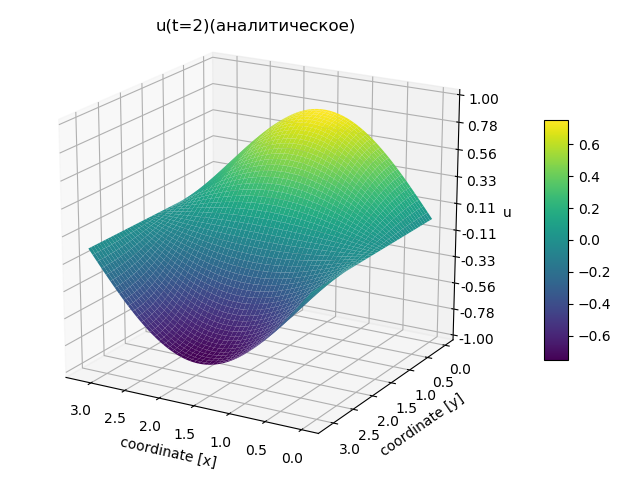

Text(0.5,0,'u')

In [16]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
N = 1000 #количество шагов по координате
M = 1000
J = 5000 #по времени
xmax = np.pi
ymax = np.pi
tmax = 5 # макс. координата и время
eps=0.0001 #задаем точность
#u=np.zeros((J,N,M), dtype=float) #создаем массив с нашими численным значениями
setka_x = np.linspace (0, xmax, N, retstep=True) 
setka_y = np.linspace (0, ymax, M, retstep=True)
setka_t = np.linspace (0, tmax, J, retstep=True)
# создаем равномерные сетки по координатам и времени (нужный шаг вычисляется автоматически)
x=setka_x[0]
h_x=setka_x[1]
t=setka_t[0]
tau=setka_t[1]
y = setka_y[0]#создаем массивы значений переменных и узнаем величину шага по каждой из 
h_y=setka_t[1]

#u[0, :] = np.sin(np.pi*x/2)
#u[:,0] = 0 #заполняем массив значений сеточной функции начальными и граничными условиями
#напишем функции для разностных операторов и коэффициентов уравнения
def analytical(x,y,t):
    return (np.exp(-2*t)-1+2*t)*np.sin(x)*np.cos(y)/4
x,y = np.meshgrid(x,y)

#for i in range(0, 251): #код для получение 250 кадров для gif-файлов
#    fig = plt.figure()
#    ax = Axes3D(fig)
#    surf=ax.plot_surface(x,y, analytical(x,y,i/50), cmap=cm.viridis)
#    ax.zaxis.set_major_locator(LinearLocator(10))
#    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
#    ax.set_zlim(-1,1)
#    ax.view_init(20, 120)
#    plt.title('u(t='+str(i/50)+')(аналитическое)')
#    fig.colorbar(surf, shrink=0.5, aspect=10)
#    ax.set_xlabel('сооrdinate [x]')
#    ax.set_ylabel('сооrdinate [y]')
#    ax.set_zlabel('u')
#    plt.savefig(str(i)+'.png')

fig = plt.figure()
ax = Axes3D(fig)
surf=ax.plot_surface(x,y, analytical(x,y,2), cmap=cm.viridis)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_zlim(-1,1)
ax.view_init(20, 120)
plt.title('u(t='+str(2)+')(аналитическое)')
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_xlabel('сооrdinate [x]')
ax.set_ylabel('сооrdinate [y]')
ax.set_zlabel('u')

Теперь решим уравнение численно.

\begin{cases}
\displaystyle \frac{\partial u}{\partial t} = \Delta u + t \sin x \cos y, \quad 0 < x < \pi, \quad 0<y < \pi \\
u \big|_{x=0, \pi}=0, \quad \frac{\partial u}{\partial y} \big|_{y=0,\pi}=0, \quad u \big|_{t=0}=0
\end{cases}
В нашей задаче по y заданы граничные условия Неймана, для этого формирование сетки по y будет происходить особым образом - для этого вводим фиктивные узлы в окрестности границ, чтобы на них можно было определить аппроксимацию оператора производной.

Введем сетку

\begin{gather}
x_n = n h_x, \: n = 0,1,...,N, \: h_x N = \pi \\
y_m = \frac{-h_y}{2} + m h_y, \: \frac{-h_y}{2} + M h_y = \pi + \frac{h_y}{2} \Rightarrow h_y = \frac{\pi}{M-1}\\
t_j = j \tau, \: j=0,1,...,J, \: \tau = \frac{T}{J}
\end{gather}
Но для реализации схемы переменных направлений для времени требуется в два раза больше шагов. Добавим еще слои $\frac{j}{2}$. Тогда шаг схемы по времени сделаем в два раза меньше, и $j=0,1,...,2J$.

<IPython.core.display.Javascript object>


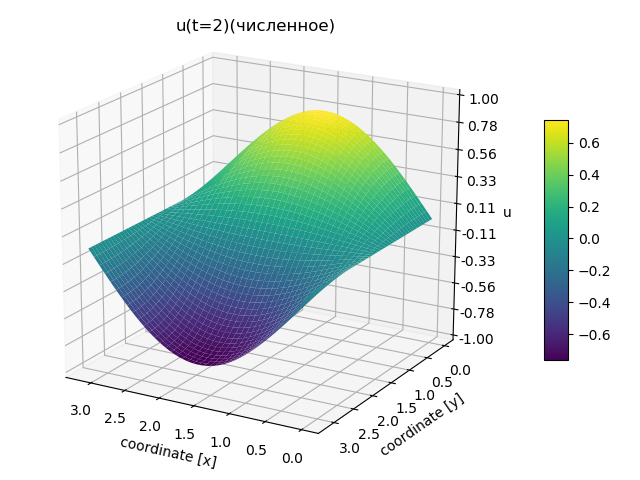

Text(0.5,0,'u')

In [17]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
#import sys
#import numpy
#numpy.set_printoptions(threshold=sys.maxsize)
J = 250 #количество шагов по времени
N = 80 #количество шагов по координате x
M = 90 #количество шагов по координате y

xmax = np.pi
ymax = np.pi
tmax = 5 # макс. координата и время
u=np.zeros((2*J+1,N+1,M+1), dtype=float) #создаем массив с нашими численным значениями
u[0,:,:]=0
u[:,0,:]=0
u[:,N,:]=0
h_y=ymax/(M-1) #особые условия для y
setka_x = np.linspace (0, xmax, N+1, retstep=True) 
y = np.linspace (-h_y/2, ymax+h_y/2, M+1)
setka_t = np.linspace (0, tmax, 2*J+1, retstep=True)
# создаем равномерные сетки по координатам и времени (нужный шаг вычисляется автоматически)
x=setka_x[0]
h_x=setka_x[1]
t=setka_t[0]
tau=setka_t[1]

def Dx(j,n,m):
    return (u[j,n-1,m]-2*u[j,n,m]+u[j,n+1,m])/(h_x)**2
def Dy(j,n,m):
    return (u[j,n,m-1]-2*u[j,n,m]+u[j,n,m+1])/(h_y)**2

def metod_progonki(a,b,c,f,dim):
    alpha=np.zeros(dim)
    beta=np.zeros(dim)
    alpha[0]=b[0]/c[0]
    beta[0]=f[0]/c[0]
    for i in range (1,dim):
        alpha[i]=b[i]/(c[i]-a[i]*alpha[i-1])
        beta[i]=(f[i]+a[i]*beta[i-1])/(c[i] - a[i]*alpha[i-1])
    #print(alpha)
    #print(beta)
    solution=np.zeros(dim)
    solution[dim-1]=beta[dim-1]
    for i in range (dim-2,-1,-1):
        solution[i]=alpha[i]*solution[i+1]+beta[i]
    #print(solution)
    return solution
#a=[np.NaN,2,2,3]
#b=[-1,-1,-0.8,0]
#c=[-5,-4.6,-3.6,-4.4]
#f=[-2,-3.3,-2.6,-7.2]
#metod_progonki(a,b,c,f,4)

def progonka_x(j):
    pr_array = np.zeros(shape=(4,N+1),dtype=float) 
    pr_array[1,:]=tau/(h_x**2) #a
    pr_array[2,:]=tau/(h_x**2) #b
    pr_array[3,:]=(1+2*tau/h_x**2) #c
    pr_array[0,0]=0 # f
    pr_array[1,0]=0 # любое a - не используется в процессе
    pr_array[2,0]=0 # b
    pr_array[3,0]=1 # любое c, не равное нулю
    pr_array[0,N]=0
    pr_array[1,N]=0
    pr_array[2,N]=0#неважно какое
    pr_array[3,N]=1 #любое, не равное нулю
    for m in range(1, M):
        for n in range(1,N):
            pr_array[0,n]=u[j,n,m]+Dy(j,n,m)*tau+tau*(tau*(j+1))*np.sin(n*h_x)*np.cos(m*h_y) #f
            #u[j+1,n,m]=metod_progonki(a,b,c,f,N+1)[n]
        alpha=np.zeros(N+1)
        beta=np.zeros(N+1)
        alpha[0]=pr_array[2,0]/pr_array[3,0]
        beta[0]=pr_array[0,0]/pr_array[3,0]
        for i in range (1,N+1):
            alpha[i]=pr_array[2,i]/(pr_array[3,i]-pr_array[1,i]*alpha[i-1])
            beta[i]=(pr_array[0,i]+pr_array[1,i]*beta[i-1])/(pr_array[3,i] - pr_array[1,i]*alpha[i-1])
        #print(u, file=open("output.txt", "a"))
        u[j+1,N,m]=beta[N]
        for i in range(N-1, -1, -1 ):
            u[j+1,i,m]=alpha[i]*u[j+1,i+1,m]+beta[i]
    #print(u, file=open("output.txt", "a"))
def progonka_y(j):
    pr_array = np.zeros(shape=(4,M+1),dtype=float) 
    pr_array[1,:]=tau/(h_y**2) #a
    pr_array[2,:]=tau/(h_y**2) #b
    pr_array[3,:]=(1+2*tau/h_y**2) #c
    pr_array[0,0]=0 # f
    pr_array[1,0]=0 # любое a - не используется в процессе
    pr_array[2,0]=1 # b
    pr_array[3,0]=1 # c и b выбираем так, чтобы удовлетворить гр. усл.: b_0*y_1=c_0*y_1
    pr_array[0,M]=0
    pr_array[1,M]=1
    pr_array[2,M]=0 #неважно какое
    pr_array[3,M]=1 # c и a выбираем так, чтобы удовлетворить гр. усл.: a_n y_n-1 = c_n y_n
    for n in range(1,N):
        for m in range(1,M):
                pr_array[0,m]=u[j+1,n,m]+Dx(j+1,n,m)*tau+tau*(tau*(j+1))*np.sin(n*h_x)*np.cos(m*h_y) #f
                #u[j+1,n,m]=metod_progonki(a,b,c,f,N+1)[n]
        alpha=np.zeros(M+1)
        beta=np.zeros(M+1)
        alpha[0]=pr_array[2,0]/pr_array[3,0]
        beta[0]=pr_array[0,0]/pr_array[3,0]
        for i in range (1,M+1):
            alpha[i]=pr_array[2,i]/(pr_array[3,i]-pr_array[1,i]*alpha[i-1])
            beta[i]=(pr_array[0,i]+pr_array[1,i]*beta[i-1])/(pr_array[3,i] - pr_array[1,i]*alpha[i-1])
        #print(u, file=open("output.txt", "a"))
        u[j+2,n,M]=beta[M]
        for i in range(M-1, -1, -1):
            u[j+2,n,i]=alpha[i]*u[j+2,n,i+1]+beta[i]
    u[j+2,0,:]=0
    u[j+2,N,:]=0

for j in range(0, 2*J-1, 2):
    progonka_x(j)
    progonka_y(j)
#print(u, file=open("output.txt", "a"))

x,y = np.meshgrid(y,x)
fig = plt.figure()
ax = Axes3D(fig)
surf=ax.plot_surface(y,x, u[200,:,:], cmap=cm.viridis)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_zlim(-1,1)
ax.view_init(20, 120)
plt.title('u(t=2)(численное)')
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_xlabel('сооrdinate [x]')
ax.set_ylabel('сооrdinate [y]')
ax.set_zlabel('u')
#for i in range(0, 251): #код для получение 250 кадров для gif-файлов
#    k=i*2
#    fig = plt.figure()
#    ax = Axes3D(fig)
#    surf=ax.plot_surface(y,x, u[k,:,:], cmap=cm.viridis)
#    ax.zaxis.set_major_locator(LinearLocator(10))
#    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
#    ax.set_zlim(-1,1)
#    ax.view_init(20, 120)
#    plt.title('u(t='+str(i/50)+')(численное)')
#    fig.colorbar(surf, shrink=0.5, aspect=10)
#    ax.set_xlabel('сооrdinate [x]')
#    ax.set_ylabel('сооrdinate [y]')
#    ax.set_zlabel('u')
#    plt.savefig(str(i)+'.png')